In [1]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,RandomizedSearchCV
from sklearn.metrics import confusion_matrix

In [2]:
selection=SelectKBest()
df=pd.read_csv("train.csv")
df.head()
df.set_index("ID",inplace=True)

In [3]:
df.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
selectio=SelectKBest(k=50)
X=df.drop('TARGET',1)
y=df["TARGET"]

In [5]:
X.shape

(76020, 369)

In [6]:
X_new=selectio.fit_transform(X,y)

C:\Users\MMOHTASHIM\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 21  22  56  57  58  59  80  84  85 131 132 133 134 155 161 162 179 180
 189 192 220 222 234 238 244 248 261 262 303 307 315 319 327 349] are constant.
  UserWarning)
C:\Users\MMOHTASHIM\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [7]:
clf=RandomForestClassifier(class_weight="balanced")
print(cross_val_score(clf, X_new, y, cv=5))  

C:\Users\MMOHTASHIM\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MMOHTASHIM\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MMOHTASHIM\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MMOHTASHIM\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MMOHTASHIM\Anaconda3\lib\site-packages\sklearn\

[0.85360079 0.85721802 0.86878453 0.86272446 0.85239755]


In [8]:
clf.fit(X_new,y)

C:\Users\MMOHTASHIM\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

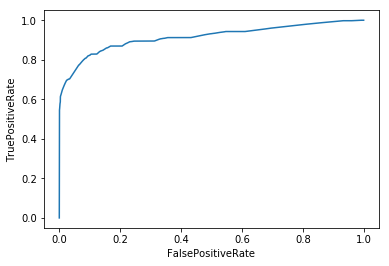

In [9]:
%matplotlib inline
scores=clf.predict_proba(X_new)
fpr, tpr, thresholds = roc_curve(y, scores[:,0])
plt.plot(tpr,fpr)
plt.xlabel("FalsePositiveRate")
plt.ylabel("TruePositiveRate")
pred=clf.predict(X_new)

In [10]:
confusion_matrix(y,pred)

array([[63486,  9526],
       [  621,  2387]], dtype=int64)

In [11]:
test=pd.read_csv("test.csv")
test.set_index("ID",inplace=True)
X_test=test


In [12]:
X_pred=selectio.transform(X_test)

In [27]:
pred=clf.predict_proba(X_pred)


In [28]:
sub=pd.read_csv("sample_submission.csv")

In [29]:
sub["TARGET"]=pred[:,1]

In [31]:
sub.to_csv("submission.csv")